In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df=pd.read_csv("kyphosis.csv")

In [3]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [4]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

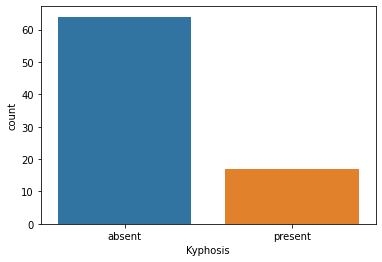

In [5]:
sns.countplot(df["Kyphosis"])

In [6]:
def enc(i):
    if "absent" in i:
        return (0)
    else:
        return (1)

In [7]:
df["Kyphosis"]=df["Kyphosis"].apply(enc)

In [8]:
df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [9]:
df["Kyphosis_present"]=df["Kyphosis"]

In [10]:
df.drop("Kyphosis",axis=1,inplace=True)

In [11]:
df

,Age,Number,Start,Kyphosis_present
0,71,3,5,0
1,158,3,14,0
2,128,4,5,1
3,2,5,1,0
4,1,4,15,0
...,...,...,...,...
76,157,3,13,1
77,26,7,13,0
78,120,2,13,0
79,42,7,6,1


<AxesSubplot:>

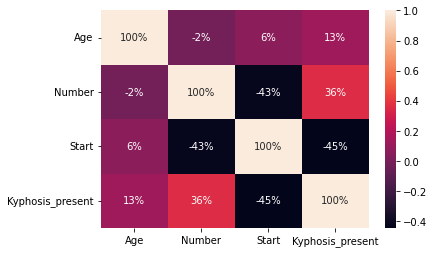

In [12]:
sns.heatmap(df.corr(),annot=True,fmt=".0%")

********We can see that data is not linearly separable and hence logistic regression will fail to perform*************




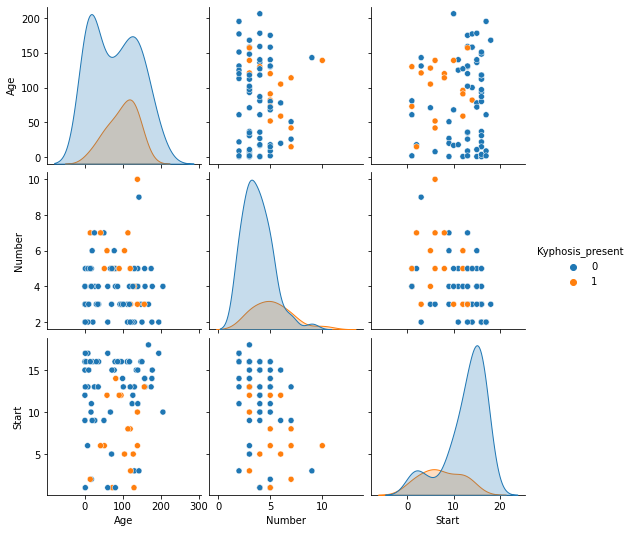

In [13]:
sns.pairplot(df,hue="Kyphosis_present")
print("********We can see that data is not linearly separable and hence logistic regression will fail to perform*************\n\n")
plt.show()

In [14]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=25)

# Feature scaling.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc=StandardScaler()

In [19]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# LOGISTIC REGRESSION MODEL.

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
reg=LogisticRegression()

In [22]:
reg.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print("Train Data")
print(classification_report(y_train,y_pred_train))
print("Test Data")
print(classification_report(y_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       0.84      0.94      0.88        49
           1       0.67      0.40      0.50        15

    accuracy                           0.81        64
   macro avg       0.75      0.67      0.69        64
weighted avg       0.80      0.81      0.79        64

Test Data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.50      0.67         2

    accuracy                           0.94        17
   macro avg       0.97      0.75      0.82        17
weighted avg       0.94      0.94      0.93        17



In [26]:
y_train_proba=reg.predict_proba(X_train)[:,1]
y_test_proba=reg.predict_proba(X_test)[:,1]

# PR CURVE.

In [27]:
from sklearn.metrics import precision_recall_curve

In [28]:
p,r,th=precision_recall_curve(y_train,y_train_proba)

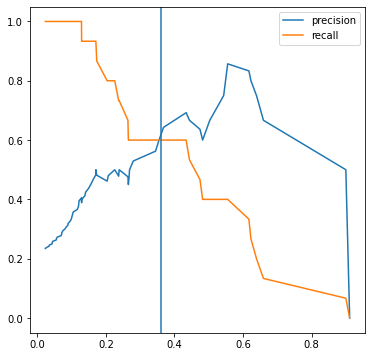

In [29]:
plt.figure(figsize=(6,6))
sns.lineplot(x=th,y=p[:-1],label="precision")
sns.lineplot(x=th,y=r[:-1],label="recall")
plt.axvline(0.36)
plt.show()

In [30]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,f1_score
def metrics(y_actual,y_train_proba,th):
    y_pred_temp=[1 if p>th else 0 for p in y_train_proba]
    accuracy=accuracy_score(y_actual,y_pred_temp)
    recall=recall_score(y_actual,y_pred_temp)
    precision=precision_score(y_actual,y_pred_temp)
    f1=f1_score(y_actual,y_pred_temp)
    roc_auc=roc_auc_score(y_actual,y_pred_temp)
    return {"F1":f1,"ROC_AUC":roc_auc,"Accuracy_score":accuracy,"Recall":recall}

In [31]:
print("Train Data")
print(metrics(y_train,y_train_proba,0.36))
print("Test Data")
print(metrics(y_test,y_test_proba,0.36))

Train Data
{'F1': 0.6206896551724138, 'ROC_AUC': 0.7489795918367348, 'Accuracy_score': 0.828125, 'Recall': 0.6}
Test Data
{'F1': 0.5714285714285715, 'ROC_AUC': 0.9, 'Accuracy_score': 0.8235294117647058, 'Recall': 1.0}


# HYPER PARAMETER TUNNING.

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid={"C":np.arange(1,15),"class_weight":["balanced","None"]}

In [34]:
grid_reg=GridSearchCV(reg,param_grid=param_grid,scoring="f1",cv=5,n_jobs=-1)
grid_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'class_weight': ['balanced', 'None']},
             scoring='f1')

In [35]:
grid_train_pred=grid_reg.predict(X_train)
grid_test_pred=grid_reg.predict(X_test)

In [36]:
print("Train data")
print(classification_report(y_train,grid_train_pred))
print(classification_report(y_test,grid_test_pred))

Train data
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        49
           1       0.45      0.67      0.54        15

    accuracy                           0.73        64
   macro avg       0.67      0.71      0.68        64
weighted avg       0.78      0.73      0.75        64

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        15
           1       0.25      1.00      0.40         2

    accuracy                           0.65        17
   macro avg       0.62      0.80      0.57        17
weighted avg       0.91      0.65      0.71        17



# WE CAN SEE THAT LOGISTIC REGRESSION IS WORKING ABNORMAL ON THIS DATA BECAUSE IT IS NOT LINEARLY SEPARABLE.

# KNN\.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [38]:
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
y_pred_train1=clf.predict(X_train)
y_pred_test1=clf.predict(X_test)
print("Train Data")
print(classification_report(y_train,y_pred_train1))
print("Test Data")
print(classification_report(y_test,y_pred_test1))

Train Data
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        49
           1       0.69      0.73      0.71        15

    accuracy                           0.86        64
   macro avg       0.80      0.82      0.81        64
weighted avg       0.86      0.86      0.86        64

Test Data
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.40      1.00      0.57         2

    accuracy                           0.82        17
   macro avg       0.70      0.90      0.73        17
weighted avg       0.93      0.82      0.85        17



# KNN IS WORKING VERY NICE.

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt=DecisionTreeClassifier()

In [41]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

In [43]:
from sklearn.metrics import classification_report

In [44]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print("Test Data")
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        15

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64

Test Data
              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.12      0.50      0.20         2

    accuracy                           0.53        17
   macro avg       0.51      0.52      0.43        17
weighted avg       0.80      0.53      0.61        17



In [47]:
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold

In [50]:
Kcv=KFold(n_splits=10,shuffle=True,random_state=1)
score=cross_val_score(dt,X,y,scoring="f1",cv=Kcv,n_jobs=-1)
print(score)
print("Average score",np.mean(score))

[0.         0.         0.66666667 0.66666667 0.33333333 0.
 0.66666667 0.         0.         0.5       ]
Average score 0.2833333333333333


In [51]:
skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=145)
score=cross_val_score(dt,X,y,scoring="f1",cv=skf,n_jobs=-1)
print(score)
print("Average score",np.mean(score))

[0.4        0.66666667 0.         0.66666667 0.         0.
 0.4        0.66666667 0.66666667 0.5       ]
Average score 0.3966666666666666


In [56]:
param_grid={
    
     "criterion":["gini","entropy"],
     "max_depth":np.arange(1,50),
     "min_samples_leaf":np.arange(1,50),
     "min_samples_split":np.arange(1,50,2),
     "class_weight":[None ,"balanced"]
}

In [57]:
from sklearn.model_selection import GridSearchCV
grid_clf=GridSearchCV(dt,param_grid=param_grid,cv=5,scoring="f1",n_jobs=-1)
grid_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             scoring='f1')

In [63]:
grid_clf.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [59]:
grid_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=3)

In [60]:
grid_clf.best_score_

0.7285714285714286

In [61]:
grid_train_pred1=grid_clf.predict(X_train)
grid_test_pred1=grid_clf.predict(X_test)

In [62]:
print("Train data")
print(classification_report(y_train,grid_train_pred1))
print(classification_report(y_test,grid_test_pred1))

Train data
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        49
           1       0.92      0.73      0.81        15

    accuracy                           0.92        64
   macro avg       0.92      0.86      0.88        64
weighted avg       0.92      0.92      0.92        64

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.25      0.50      0.33         2

    accuracy                           0.76        17
   macro avg       0.59      0.65      0.60        17
weighted avg       0.84      0.76      0.80        17

